In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file_path = "../../../../logs/freqs.log"

with open(file_path, 'r') as file:
    lines = [line.strip().strip('[ ]') for line in file.readlines()]
    
    prep_lines = []
    for i in range(0, len(lines), 2):
        if i + 1 < len(lines):
            prep_lines.append(lines[i] + ' ' + lines[i + 1])
    
    for i, line in enumerate(prep_lines):
        prep_lines[i] = [x for x in line.split(' ') if x]

    print(prep_lines)

[['1.00051679', '1.00103903', '1.00202914', '1.00329578', '1.00430753', '1.00495364', '1.00563844', '1.00624711', '1.0065488', '1.00698662'], ['1.00054129', '1.00100737', '1.00195802', '1.0031942', '1.00417085', '1.00474174', '1.00541235', '1.00610592', '1.00642506', '1.00686315'], ['1.0006629', '1.00075813', '1.00134568', '1.00213836', '1.00280514', '1.00303068', '1.00370737', '1.00456026', '1.00488922', '1.00538348'], ['1.00065922', '1.00082512', '1.00140545', '1.00214227', '1.00274169', '1.0030078', '1.00364193', '1.00432035', '1.00466276', '1.00518937'], ['1.00079197', '1.00186371', '1.00285187', '1.00415968', '1.00520054', '1.00634139', '1.00764597', '1.00878908', '1.00980493', '1.0107652'], ['1.00076739', '1.00188982', '1.0028383', '1.00415005', '1.00517643', '1.0061943', '1.00748115', '1.00864859', '1.00970161', '1.01060609'], ['1.00099754', '1.00219763', '1.00278421', '1.00395855', '1.00468564', '1.00516794', '1.00618028', '1.0072129', '1.00831321', '1.0089642'], ['1.00111676',

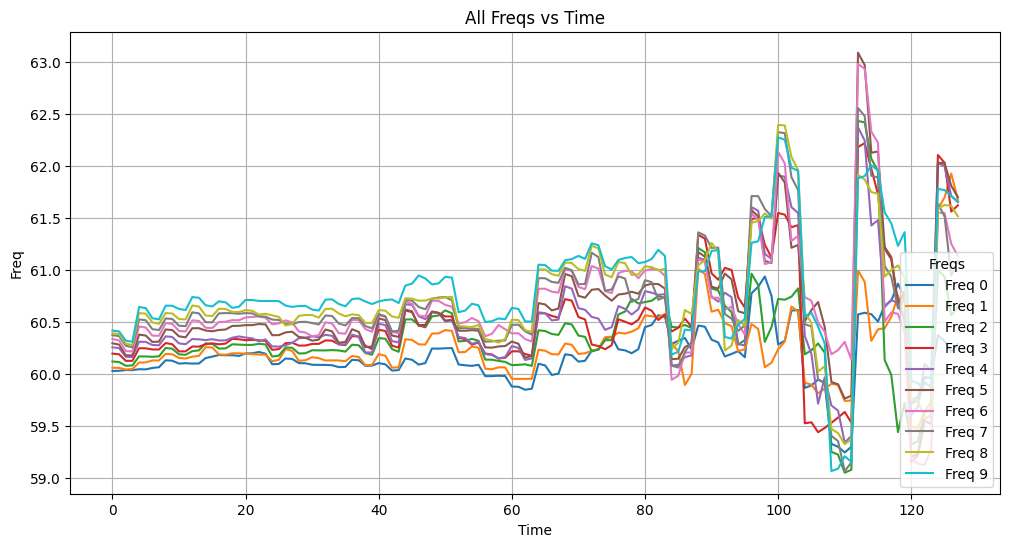

In [3]:
import pandas as pd

num = []
freqs = []
for i, line in enumerate(prep_lines):
    num.append(i)
    freqs.append([float(value) for value in line])

num = np.array(num)
freqs = np.array(freqs).T*60    
# Convert the `freqs` array to a DataFrame for easier plotting with seaborn
freqs_df = pd.DataFrame(freqs.T, columns=[f'Freq {i}' for i in range(freqs.shape[0])])
freqs_df['Time'] = num

# Use a professional palette from seaborn
palette = sns.color_palette("tab10", n_colors=len(freqs_df.columns) - 1)

# Plot all freqs on a single graph
plt.figure(figsize=(12, 6))
for idx, freq in enumerate(freqs_df.columns[:-1]):  # Exclude the 'Time' column
    sns.lineplot(data=freqs_df, x='Time', y=freq, label=freq, color=palette[idx])
plt.xlabel('Time')
plt.ylabel('Freq')
plt.title('All Freqs vs Time')
plt.legend(title='Freqs', loc='lower right')
plt.grid()
plt.show()